In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Microbiology & Antibiotic Matching

Data Sources:
MICROBIOLOGYEVENTS.csv for culture results (organism, susceptibility).
PRESCRIPTIONS.csv to see which antibiotics were given.

Visualization:
Heatmap: Rows = top 10 most commonly isolated organisms; Columns = antibiotics used to treat them. The cells represent how often each organism-antibiotic pair was used.

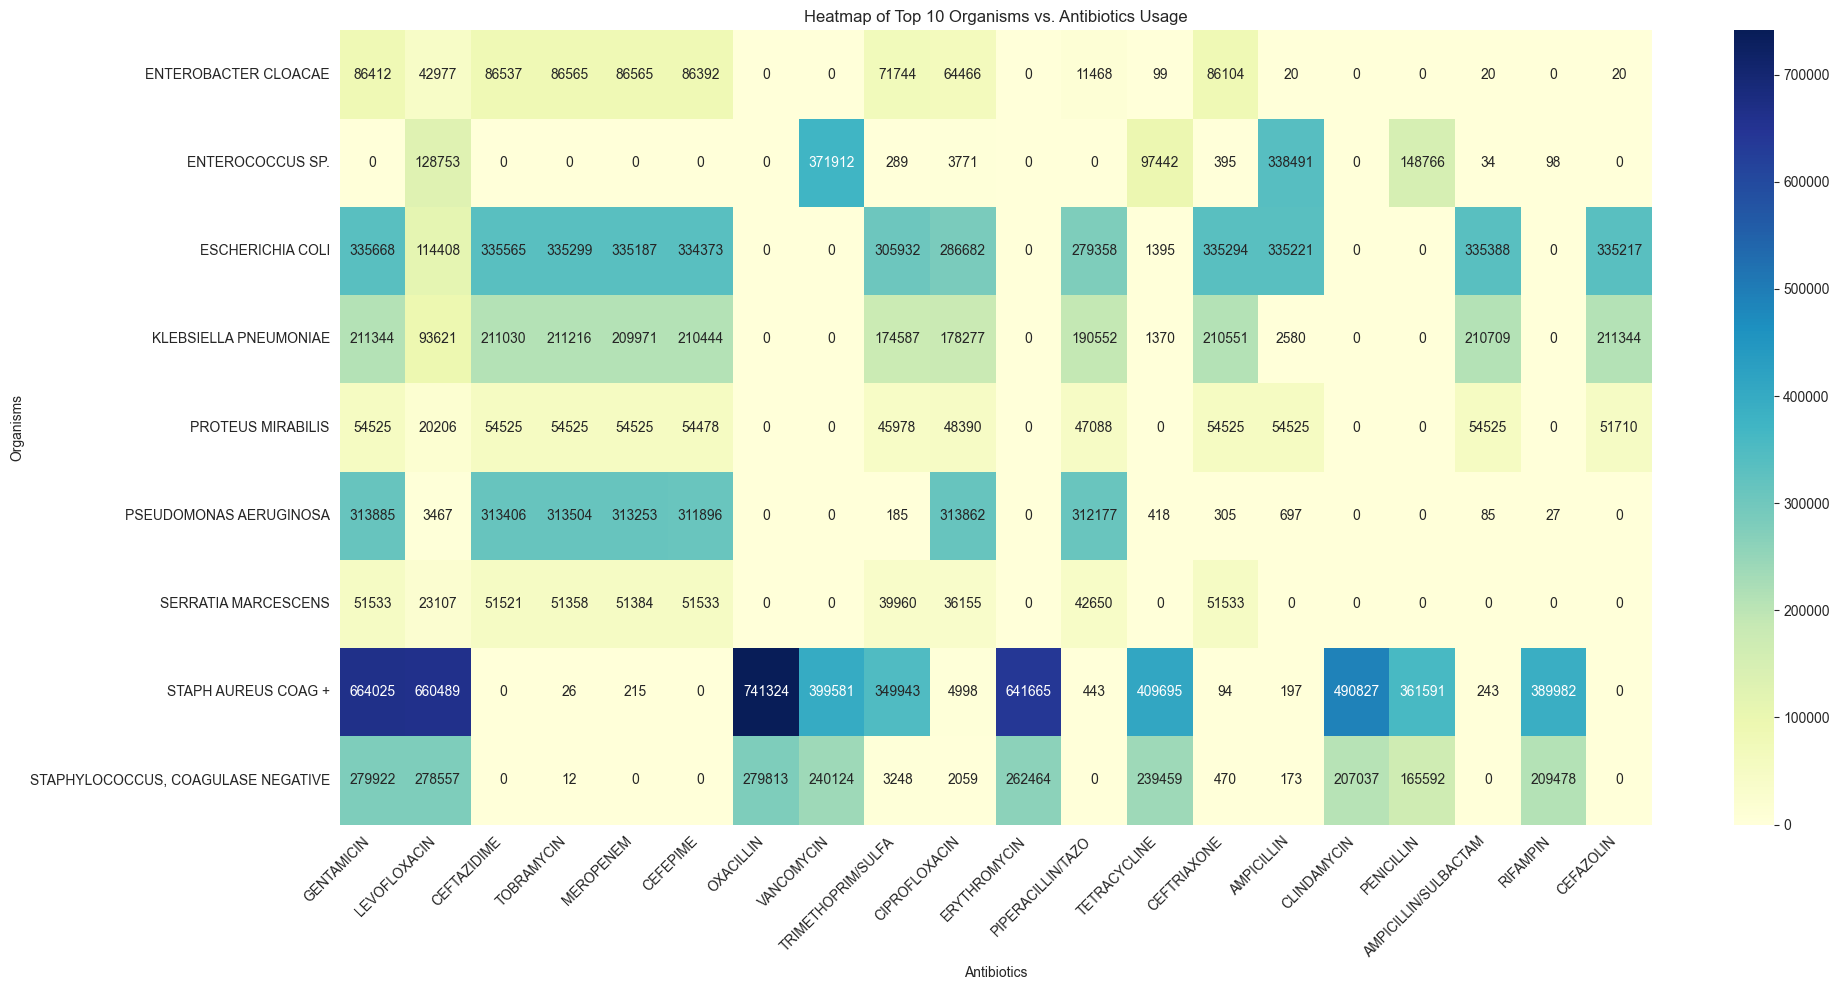

In [2]:
microbiologyevents = pd.read_csv("data/MICROBIOLOGYEVENTS.csv", parse_dates=['CHARTDATE', 'CHARTTIME'], low_memory=False)
prescriptions = pd.read_csv("data/PRESCRIPTIONS.csv", parse_dates=['STARTDATE', 'ENDDATE'], low_memory=False)

# Identify Top 10 Organisms
top_orgs = microbiologyevents['ORG_NAME'].value_counts().head(10).index.tolist()
filtered_micro = microbiologyevents[microbiologyevents['ORG_NAME'].isin(top_orgs)]

# Identify Relevant Antibiotics
antibiotics = filtered_micro['AB_NAME'].unique().tolist()

# Merge microbiologyevents with prescriptions on SUBJECT_ID and HADM_ID
merged_df = pd.merge(filtered_micro, prescriptions, on=['SUBJECT_ID', 'HADM_ID'], how='left')

# Filter prescriptions administered after the culture was taken
merged_df = merged_df[merged_df['STARTDATE'] >= merged_df['CHARTDATE']]

# Create a pivot table counting occurrences
pivot_table = pd.crosstab(merged_df['ORG_NAME'], merged_df['AB_NAME'])

# Limit to top antibiotics (optional)
top_ab = pivot_table.sum().sort_values(ascending=False).head(20).index.tolist()
pivot_table = pivot_table[top_ab]

# Plot Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Top 10 Organisms vs. Antibiotics Usage')
plt.xlabel('Antibiotics')
plt.ylabel('Organisms')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()